# 1. Import des bibliothèques

In [13]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Chargement du modèle

In [2]:
MODEL_PATH = r'photo_classifier_model.h5'
model = load_model(MODEL_PATH)

W0000 00:00:1759807508.032996     944 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# 3. Évaluation du modèle sur l'ensemble de validation

In [3]:
BASE_DIR = r'training_data'
VALIDATION_DIR = os.path.join(BASE_DIR) # Le générateur utilisera le subset de validation
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

validation_generator = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

loss, accuracy = model.evaluate(validation_generator)
print(f'Perte sur les données de validation : {loss:.4f}')
print(f'Précision sur les données de validation : {accuracy:.4f}')

Found 1334 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 41s 907ms/step - accuracy: 0.9940 - loss: 0.0223
Perte sur les données de validation : 0.0223
Précision sur les données de validation : 0.9940


# 4. Prédiction sur une nouvelle image

In [8]:
image_path=r'test_2.jpg'
def predict_image(image_path):
    # Charger et redimensionner l'image
    img = load_img(image_path, target_size=IMG_SIZE)
    # Convertir l'image en tableau numpy
    img_array = img_to_array(img)
    # Mettre à l'échelle les valeurs des pixels
    img_array = img_array / 255.0
    # Ajouter une dimension pour le lot (batch)
    img_array = np.expand_dims(img_array, axis=0)

    # Faire la prédiction
    prediction = model.predict(img_array)[0][0]

    # Interpréter le résultat (seuil à 0.5)
    # flow_from_directory assigne les classes par ordre alphabétique : non_photo=0, photo=1
    if prediction > 0.5:
        print(f'Prédiction : Photo (Confiance: {prediction:.2f})')
    else:
        print(f'Prédiction : Non-Photo (Confiance: {1-prediction:.2f})')

# Exemple d'utilisation :
# Remplacez 'chemin/vers/votre/image.jpg' par le chemin d'une image à tester
predict_image(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Prédiction : Photo (Confiance: 0.74)


# Matrix de confusion

In [15]:
MODEL_PATH = '/tf/code/notebooks/phase_1/photo_classifier_model.h5'
model= load_model(MODEL_PATH)

In [18]:
BASE_DIR = '/tf/code/notebooks/phase_1'
VALIDATION_DIR = os.path.join(BASE_DIR, 'training_data')
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
 
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,           # Augmenter la rotation
    width_shift_range=0.15,      # Augmenter les décalages horizontaux
    height_shift_range=0.15,     # Augmenter les décalages verticaux
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3], # Ajouter une variation de luminosité
    validation_split=0.2
)

validation_generator = datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 1334 images belonging to 2 classes.


42/42 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step


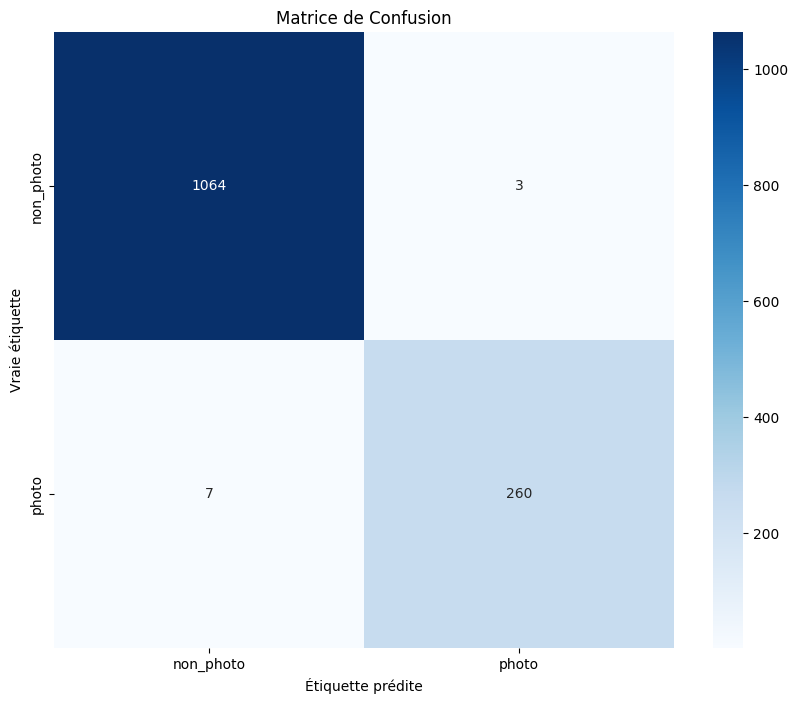

In [20]:
 
 

# Prédictions pour la matrice de confusion
validation_steps = validation_generator.samples // BATCH_SIZE + 1
predictions = model.predict(validation_generator, steps=validation_steps)

# Code original corrigé (seuil à 0.5)
# predicted_classes = (predictions > 0.5).astype(int).flatten()

# Nouveau code avec seuil ajusté (exemple à 0.45)
seuil_optimal = 0.4 # Testez 0.40 ou 0.45
predicted_classes = (predictions > seuil_optimal).astype(int).flatten()

# Vraies étiquettes
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

# Matrice de confusion
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matrice de Confusion')
plt.ylabel('Vraie étiquette')
plt.xlabel('Étiquette prédite')
plt.show()